# Technical Test Pythae

To run this notebook you will need a Python version >=3.8

## Preliminaries: Setup environnement & Data

In [1]:
#%pip install pythae torchvision torch torchsummary matplotlib

In [2]:
import torch
from torch.utils.data import Dataset
from pythae.data.datasets import DatasetOutput


class MNIST(Dataset):
    def __init__(self, data):
        self.data = data.type(torch.float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        return DatasetOutput(data=x)


In [3]:
from torchvision import datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [4]:
import random

def sample_indices(vector, k, seed=None):
    # # Example usage:
    # vector = torch.tensor([0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3])  # Example tensor with 4 labels
    # k = 3  # Number of points to sample from each label
    # seed = 42  # Seed for reproducibility
    # sampled_indices = sample_indices(vector, k, seed)
    # print("Sampled indices:", sampled_indices)

    if seed is not None:
        random.seed(seed)

    indices = []
    label_dict = {}

    # Group indices by label
    for i, label in enumerate(vector):
        label = label.item() if torch.is_tensor(label) else label
        if label not in label_dict:
            label_dict[label] = [i]
        else:
            label_dict[label].append(i)

    # Sample k points from each label
    for label, label_indices in label_dict.items():
        sampled_indices = random.sample(label_indices, min(k, len(label_indices)))
        indices.extend(sampled_indices)

    random.shuffle(indices)

    return indices

In [5]:
train_indeces = sample_indices(mnist_trainset.targets, k=20, seed=42)

remaining_indeces = list(set(range(len(mnist_trainset.targets)))-set(train_indeces))
test_indeces = sample_indices(mnist_trainset.targets[remaining_indeces], k=10, seed=42)

In [6]:
train_dataset = MNIST(mnist_trainset.data[train_indeces].reshape(-1, 1, 28, 28) / 255.)
eval_dataset = MNIST(mnist_trainset.data[test_indeces].reshape(-1, 1, 28, 28) / 255.)
print(train_dataset.data.shape, eval_dataset.data.shape)

torch.Size([200, 1, 28, 28]) torch.Size([100, 1, 28, 28])


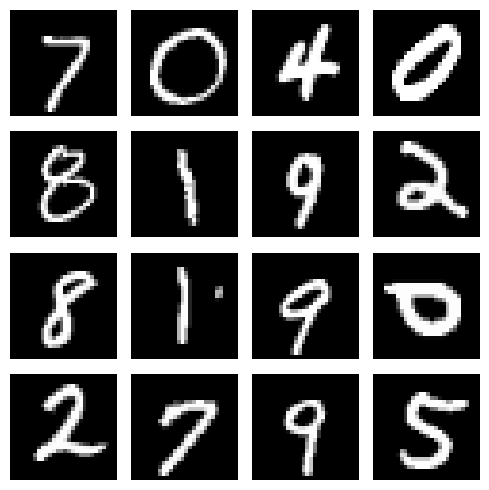

In [7]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_dataset[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

## Step 1: Training a VAE with Pythae

To train a VAE with Pythae, the first step is to define the configuration you want to apply to your
autoencoder model. This will be used to instantiate the VAE instance. Then, you will need to
setup the training configuration and launch a training.

**Objective: Complete the following code based so you can launch a training using Pythae's model.**

Required training setup:
- The model should have a latent dimension of 8
- Train the model for 50 epochs, a learning rate of 3e-3 and batch_size of 64
- Save the best model on validation set in a folder named `experiments`

In [8]:
from pythae.models import RHVAEConfig, RHVAE


model_config = RHVAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=8
)

model = RHVAE(
    model_config=model_config
)

In [9]:
from pythae.trainers import BaseTrainerConfig, BaseTrainer


training_config = BaseTrainerConfig(
    output_dir='experiments',
    num_epochs=50,
    learning_rate=3e-3,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
)

trainer = BaseTrainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    training_config=training_config
)

trainer.train()

Model passed sanity check !
Ready for training.

Created experiments/RHVAE_training_2024-04-08_13-57-30. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 50
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.003
    maximize: False
    weight_decay: 0
)
Scheduler: None

Successfully launched training !



Training of epoch 1/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 1/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 76.5878
Eval loss: 47.786
--------------------------------------------------------------------------


Training of epoch 2/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 2/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 47.1967
Eval loss: 39.4436
--------------------------------------------------------------------------


Training of epoch 3/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 3/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 41.1611
Eval loss: 35.5407
--------------------------------------------------------------------------


Training of epoch 4/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 4/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 35.7827
Eval loss: 28.3785
--------------------------------------------------------------------------


Training of epoch 5/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 5/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 32.8948
Eval loss: 26.6198
--------------------------------------------------------------------------


Training of epoch 6/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 6/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 31.0234
Eval loss: 25.4597
--------------------------------------------------------------------------


Training of epoch 7/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 7/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 29.1836
Eval loss: 23.8643
--------------------------------------------------------------------------


Training of epoch 8/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 8/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 28.2567
Eval loss: 23.2612
--------------------------------------------------------------------------


Training of epoch 9/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 9/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 28.4582
Eval loss: 25.0873
--------------------------------------------------------------------------


Training of epoch 10/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 10/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 28.5549
Eval loss: 24.0816
--------------------------------------------------------------------------


Training of epoch 11/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 11/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.3146
Eval loss: 24.3677
--------------------------------------------------------------------------


Training of epoch 12/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 12/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.6701
Eval loss: 23.7407
--------------------------------------------------------------------------


Training of epoch 13/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 13/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.4508
Eval loss: 23.5222
--------------------------------------------------------------------------


Training of epoch 14/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 14/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.9361
Eval loss: 23.432
--------------------------------------------------------------------------


Training of epoch 15/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 15/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.971
Eval loss: 23.314
--------------------------------------------------------------------------


Training of epoch 16/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 16/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.8314
Eval loss: 23.6195
--------------------------------------------------------------------------


Training of epoch 17/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 17/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.4223
Eval loss: 23.3892
--------------------------------------------------------------------------


Training of epoch 18/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 18/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.0021
Eval loss: 23.4689
--------------------------------------------------------------------------


Training of epoch 19/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 19/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.8771
Eval loss: 23.0572
--------------------------------------------------------------------------


Training of epoch 20/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 20/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.5083
Eval loss: 23.8259
--------------------------------------------------------------------------


Training of epoch 21/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 21/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.8212
Eval loss: 23.4257
--------------------------------------------------------------------------


Training of epoch 22/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 22/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.7495
Eval loss: 22.7573
--------------------------------------------------------------------------


Training of epoch 23/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 23/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.9063
Eval loss: 23.7878
--------------------------------------------------------------------------


Training of epoch 24/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 24/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.9015
Eval loss: 22.7542
--------------------------------------------------------------------------


Training of epoch 25/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 25/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.3511
Eval loss: 22.2321
--------------------------------------------------------------------------


Training of epoch 26/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 26/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.6872
Eval loss: 22.0242
--------------------------------------------------------------------------


Training of epoch 27/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 27/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.4551
Eval loss: 22.867
--------------------------------------------------------------------------


Training of epoch 28/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 28/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.5202
Eval loss: 22.2725
--------------------------------------------------------------------------


Training of epoch 29/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 29/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.8713
Eval loss: 22.6806
--------------------------------------------------------------------------


Training of epoch 30/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 30/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.6304
Eval loss: 22.242
--------------------------------------------------------------------------


Training of epoch 31/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 31/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.5074
Eval loss: 22.3016
--------------------------------------------------------------------------


Training of epoch 32/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 32/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.7867
Eval loss: 22.8323
--------------------------------------------------------------------------


Training of epoch 33/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 33/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.7174
Eval loss: 21.8754
--------------------------------------------------------------------------


Training of epoch 34/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 34/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.5098
Eval loss: 22.2174
--------------------------------------------------------------------------


Training of epoch 35/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 35/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.4269
Eval loss: 22.0054
--------------------------------------------------------------------------


Training of epoch 36/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 36/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 26.0052
Eval loss: 22.5175
--------------------------------------------------------------------------


Training of epoch 37/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 37/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.9997
Eval loss: 22.0841
--------------------------------------------------------------------------


Training of epoch 38/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 38/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.8569
Eval loss: 21.3914
--------------------------------------------------------------------------


Training of epoch 39/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 39/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.9238
Eval loss: 22.6482
--------------------------------------------------------------------------


Training of epoch 40/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 40/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.5222
Eval loss: 22.1895
--------------------------------------------------------------------------


Training of epoch 41/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 41/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.9395
Eval loss: 23.103
--------------------------------------------------------------------------


Training of epoch 42/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 42/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.4333
Eval loss: 22.2278
--------------------------------------------------------------------------


Training of epoch 43/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 43/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 25.0664
Eval loss: 21.829
--------------------------------------------------------------------------


Training of epoch 44/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 44/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.4047
Eval loss: 22.0312
--------------------------------------------------------------------------


Training of epoch 45/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 45/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.152
Eval loss: 22.253
--------------------------------------------------------------------------


Training of epoch 46/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 46/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.646
Eval loss: 23.1396
--------------------------------------------------------------------------


Training of epoch 47/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 47/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.7095
Eval loss: 22.8896
--------------------------------------------------------------------------


Training of epoch 48/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 48/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.4028
Eval loss: 21.9504
--------------------------------------------------------------------------


Training of epoch 49/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 49/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.7156
Eval loss: 22.2591
--------------------------------------------------------------------------


Training of epoch 50/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 50/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.3237
Eval loss: 22.4976
--------------------------------------------------------------------------
Training ended!
Saved final model in experiments/RHVAE_training_2024-04-08_13-57-30/final_model


## Step 2: Generating synthetic images with PythAE

In [31]:
from pythae.models import AutoModel

import glob

# trained_model = AutoModel.load_from_folder(
#     glob.glob('experiments/*/final_model')[0]
# )

trained_model = model

### Normal Sampler

In [32]:
from pythae.samplers import NormalSampler


sampler = NormalSampler(
    model=trained_model,
    sampler_config=None
)
gen_data = sampler.sample(
    num_samples=16,
)

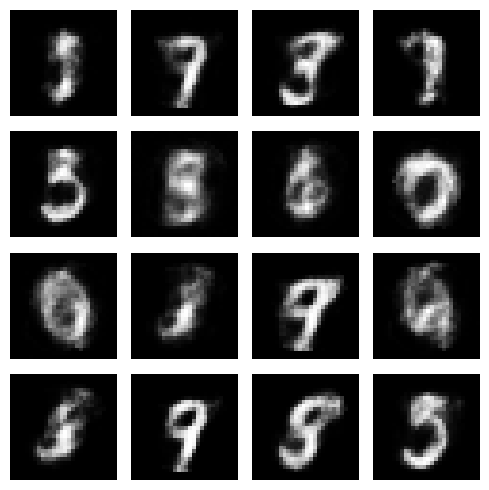

In [33]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

### Gaussian Mixture Model Sampler

In [34]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig


gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

gmm_sampler.fit(
    train_data=train_dataset.data
)

gmm_gen_data = gmm_sampler.sample(
   num_samples=16
)

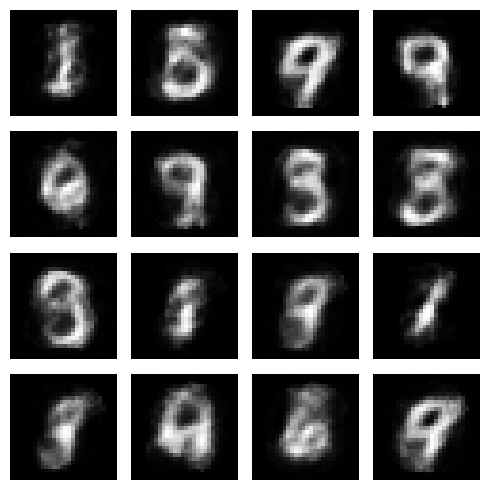

In [35]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(gmm_gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

### RHVAE Sampler

In [36]:
from pythae.samplers import RHVAESampler, RHVAESamplerConfig


rh_sampler_config = RHVAESamplerConfig(
)

rh_sampler = RHVAESampler(
    sampler_config=None,
    model=trained_model
)

rh_sampler.fit(
    train_data=train_dataset.data
)

rh_gen_data = rh_sampler.sample(
   num_samples=16
)

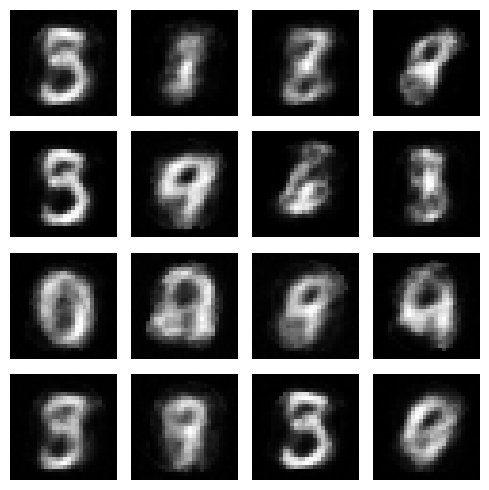

In [37]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(rh_gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()